# Lab: Exploring a Dataset

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import mne
import ipytest
ipytest.autoconfig()

## Explore files

In [2]:
pathname = "/home/fdamicel/projects/pycourse/data/ds005420"
PATH = pathlib.Path(pathname)

In [3]:
subpaths = list(PATH.iterdir())
subpaths[:3]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31')]

In [4]:
[p for p in subpaths if p.is_dir()]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/.git'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/py

In [5]:
[p for p in subpaths if p.is_dir() if "sub-" in p.name]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-25'),
 PosixPath('/home/fdamicel/projects/

In [6]:
def get_subject_folders(path):
    subpaths = path.iterdir()
    return [p for p in subpaths if p.is_dir() if "sub-" in p.name]

In [7]:
get_subject_folders(PATH)

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-25'),
 PosixPath('/home/fdamicel/projects/

In [8]:
def get_metadata_n_participants(path):
    metadata = pd.read_csv(path/"participants.tsv", sep="\t")
    return metadata.participant_id.nunique()

In [9]:
get_metadata_n_participants(PATH)

37

In [10]:
%%ipytest

def test_get_subject_folders():
    assert len(get_subject_folders(PATH)) == get_metadata_n_participants(PATH)

.                                                                                            [100%]
1 passed in 0.01s


In [11]:
subject_path = subpaths[0]

In [12]:
# ipython magic: use python variables in system calls
!ls {subject_path}

eeg  sub-26_scans.tsv


In [13]:
!ls {subject_path}/eeg

sub-26_task-oa_channels.tsv  sub-26_task-oc_channels.tsv
sub-26_task-oa_eeg.edf	     sub-26_task-oc_eeg.edf
sub-26_task-oa_eeg.json      sub-26_task-oc_eeg.json


## Exploratory data analysis

In [14]:
subject_files = list((subject_path/"eeg").iterdir())
subject_files

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.json'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.json'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.edf'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_channels.tsv'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.edf'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_channels.tsv')]

In [15]:
# Grab one file
file = subject_files[4]
file

PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.edf')

In [16]:
content = mne.io.read_raw_edf(file)
rawdata = content.get_data()
ts = content.to_data_frame()

Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [17]:
content

<RawEDF | sub-26_task-oc_eeg.edf, 20 x 157500 (315.0 s), ~20 KiB, data not loaded>

In [18]:
ts

,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,...,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000,12.973461,9.769117,0.919027,7.785476,11.142407,13.431224,5.038896,10.226881,8.395827,...,16.635567,9.463942,3.055255,5.496660,6.564774,-0.149088,-1.217202,0.461263,3.665607,26.706360
1,0.002,17.093330,12.363109,1.834553,10.074293,14.041575,16.940743,7.327713,12.820873,11.142407,...,21.518376,6.564774,4.123370,7.175125,8.090652,-0.149088,-1.522378,0.003500,4.275958,35.556451
2,0.004,20.602849,14.041575,4.581133,10.532056,14.651926,17.856269,8.090652,13.431224,11.905346,...,21.976139,0.461263,4.275958,7.480301,7.938064,-0.301676,-2.285317,-1.522378,3.665607,40.744435
3,0.006,22.891666,13.736399,8.090652,8.853591,12.363109,16.330392,6.564774,12.057934,10.989820,...,18.161445,-7.320713,3.513019,6.717362,6.412186,-0.454263,-3.658607,-3.353431,1.987141,41.049610
4,0.008,23.502017,12.210522,11.294995,5.496660,8.243240,12.515697,3.055255,9.311354,8.853591,...,11.142407,-14.797514,2.292317,5.649248,4.123370,-0.301676,-5.031896,-4.879309,-0.301676,37.234916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157495,314.990,13.583812,-3.811194,-5.031896,16.788155,10.074293,0.919027,-8.999179,2.292317,11.142407,...,-2.132729,1.529378,15.262277,0.461263,-1.827553,-2.132729,10.684644,0.308676,-1.522378,16.482979
157496,314.992,0.613851,-3.963782,-5.337072,13.736399,-2.590492,1.529378,0.156088,1.529378,-1.827553,...,-0.606851,0.613851,4.123370,0.308676,-0.301676,-1.217202,-1.827553,0.156088,-1.827553,13.431224
157497,314.994,-13.576812,-4.421545,-5.642248,1.529378,-16.781155,1.376790,10.989820,-0.606851,-15.713040,...,1.071614,-1.674965,-12.356109,-0.149088,1.376790,0.003500,-16.170804,-0.454263,-2.132729,1.224202
157498,314.996,-21.053612,-4.879309,-5.642248,-14.187163,-24.257956,0.156088,17.245918,-3.048255,-22.274315,...,1.834553,-4.421545,-25.020894,-0.606851,2.292317,1.224202,-23.647605,-1.064614,-2.132729,-14.492338


In [19]:
ts.shape

(157500, 21)

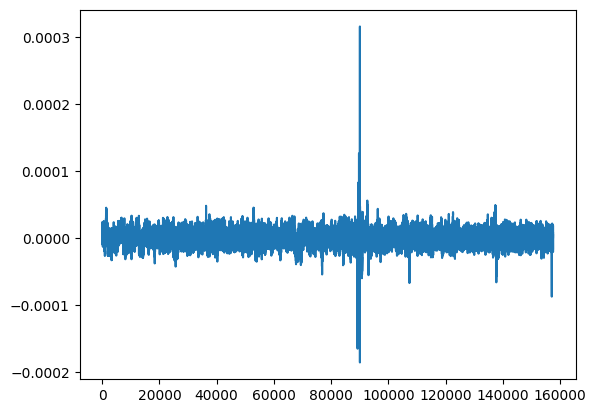

In [20]:
# Plot one time series:
plt.plot(rawdata[0])

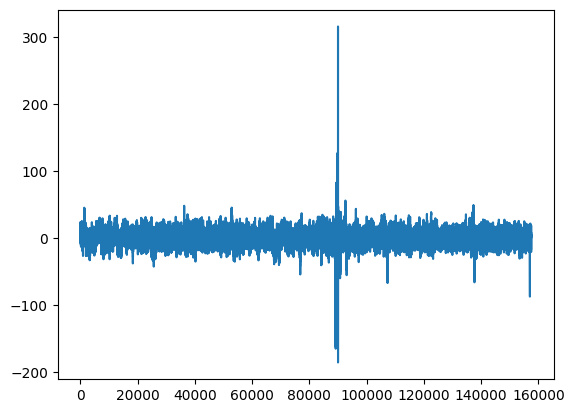

In [21]:
plt.plot(ts.iloc[:, 1])

Let's clean the column names:

In [22]:
ts.columns

Index(['time', 'EEG Fp1-A1A2', 'EEG Fp2-A1A2', 'EEG Fz-A1A2', 'EEG F3-A1A2',
       'EEG F4-A1A2', 'EEG F7-A1A2', 'EEG F8-A1A2', 'EEG Cz-A1A2',
       'EEG C3-A1A2', 'EEG C4-A1A2', 'EEG T3-A1A2', 'EEG T4-A1A2',
       'EEG Pz-A1A2', 'EEG P3-A1A2', 'EEG P4-A1A2', 'EEG T5-A1A2',
       'EEG T6-A1A2', 'EEG O1-A1A2', 'EEG O2-A1A2', 'EEG LOC-ROC'],
      dtype='object')

In [23]:
col = ts.columns[1]
col

'EEG Fp1-A1A2'

In [24]:
col[4:]

'Fp1-A1A2'

In [25]:
ts.columns = [col[4:] if col != "time" else col for col in ts.columns]
ts.head()

,time,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,...,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000,12.973461,9.769117,0.919027,7.785476,11.142407,13.431224,5.038896,10.226881,8.395827,...,16.635567,9.463942,3.055255,5.496660,6.564774,-0.149088,-1.217202,0.461263,3.665607,26.706360
1,0.002,17.093330,12.363109,1.834553,10.074293,14.041575,16.940743,7.327713,12.820873,11.142407,...,21.518376,6.564774,4.123370,7.175125,8.090652,-0.149088,-1.522378,0.003500,4.275958,35.556451
2,0.004,20.602849,14.041575,4.581133,10.532056,14.651926,17.856269,8.090652,13.431224,11.905346,...,21.976139,0.461263,4.275958,7.480301,7.938064,-0.301676,-2.285317,-1.522378,3.665607,40.744435
3,0.006,22.891666,13.736399,8.090652,8.853591,12.363109,16.330392,6.564774,12.057934,10.989820,...,18.161445,-7.320713,3.513019,6.717362,6.412186,-0.454263,-3.658607,-3.353431,1.987141,41.049610
4,0.008,23.502017,12.210522,11.294995,5.496660,8.243240,12.515697,3.055255,9.311354,8.853591,...,11.142407,-14.797514,2.292317,5.649248,4.123370,-0.301676,-5.031896,-4.879309,-0.301676,37.234916


In [26]:
# Tip: sumsample for faster plotting

In [27]:
ts.iloc[0]

time         0.000000
Fp1-A1A2    12.973461
Fp2-A1A2     9.769117
Fz-A1A2      0.919027
F3-A1A2      7.785476
F4-A1A2     11.142407
F7-A1A2     13.431224
F8-A1A2      5.038896
Cz-A1A2     10.226881
C3-A1A2      8.395827
C4-A1A2      2.139729
T3-A1A2     16.635567
T4-A1A2      9.463942
Pz-A1A2      3.055255
P3-A1A2      5.496660
P4-A1A2      6.564774
T5-A1A2     -0.149088
T6-A1A2     -1.217202
O1-A1A2      0.461263
O2-A1A2      3.665607
LOC-ROC     26.706360
Name: 0, dtype: float64

In [28]:
ts.shape

(157500, 21)

In [29]:
ts.head(2)

,time,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,...,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000,12.973461,9.769117,0.919027,7.785476,11.142407,13.431224,5.038896,10.226881,8.395827,...,16.635567,9.463942,3.055255,5.496660,6.564774,-0.149088,-1.217202,0.461263,3.665607,26.706360
1,0.002,17.093330,12.363109,1.834553,10.074293,14.041575,16.940743,7.327713,12.820873,11.142407,...,21.518376,6.564774,4.123370,7.175125,8.090652,-0.149088,-1.522378,0.003500,4.275958,35.556451


<Axes: >

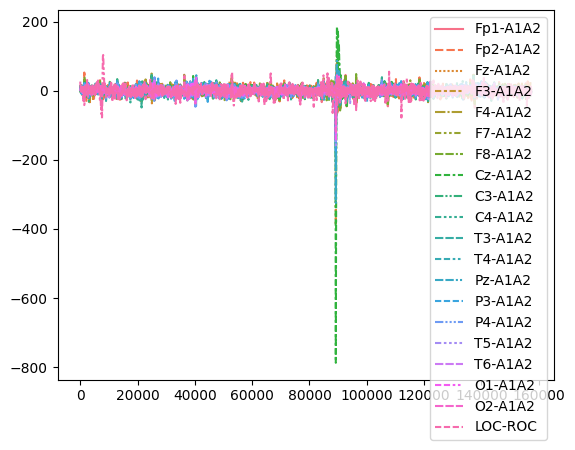

In [30]:
# Plot directly from wide format
sns.lineplot(
    data=ts.iloc[::100, :][[c for c in ts.columns if c != "time"]],
)

In [31]:
def wide2long(ts):
    return ts.melt(id_vars=["time"], var_name="channel")
wide2long(ts)

,time,channel,value
0,0.000,Fp1-A1A2,12.973461
1,0.002,Fp1-A1A2,17.093330
2,0.004,Fp1-A1A2,20.602849
3,0.006,Fp1-A1A2,22.891666
4,0.008,Fp1-A1A2,23.502017
...,...,...,...
3149995,314.990,LOC-ROC,16.482979
3149996,314.992,LOC-ROC,13.431224
3149997,314.994,LOC-ROC,1.224202
3149998,314.996,LOC-ROC,-14.492338


In [32]:
sns.set() # Magic!

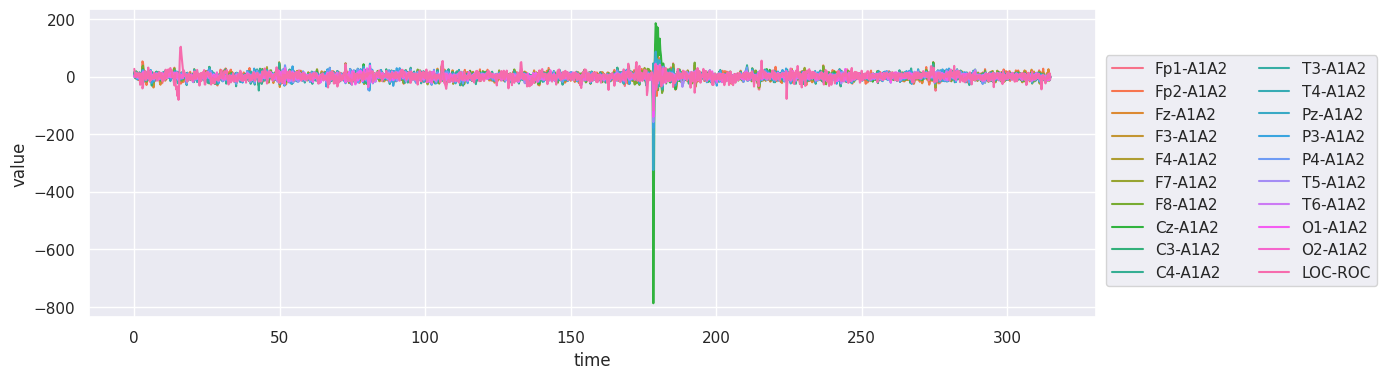

In [33]:
def plot_all_ts(ts):
    fig, ax = plt.subplots(figsize=(13, 4))
    ts_long = wide2long(ts)
    sns.lineplot(data=ts_long, x="time", y="value", hue="channel", ax=ax)
    # Place the legend outside the plot in two columns
    ax.legend(bbox_to_anchor=(1.01, 0.85), loc='upper left', borderaxespad=0, ncol=2)
    
plot_all_ts(ts.iloc[::100, :])   # Subsample for fast plotting

In [36]:
selected_cols = [
    col 
    for col in ts.columns 
    if col == "time" 
        or col.startswith("O") 
        or col.startswith("T")
        or col.startswith("P")
]
selected_cols

['time',
 'T3-A1A2',
 'T4-A1A2',
 'Pz-A1A2',
 'P3-A1A2',
 'P4-A1A2',
 'T5-A1A2',
 'T6-A1A2',
 'O1-A1A2',
 'O2-A1A2']

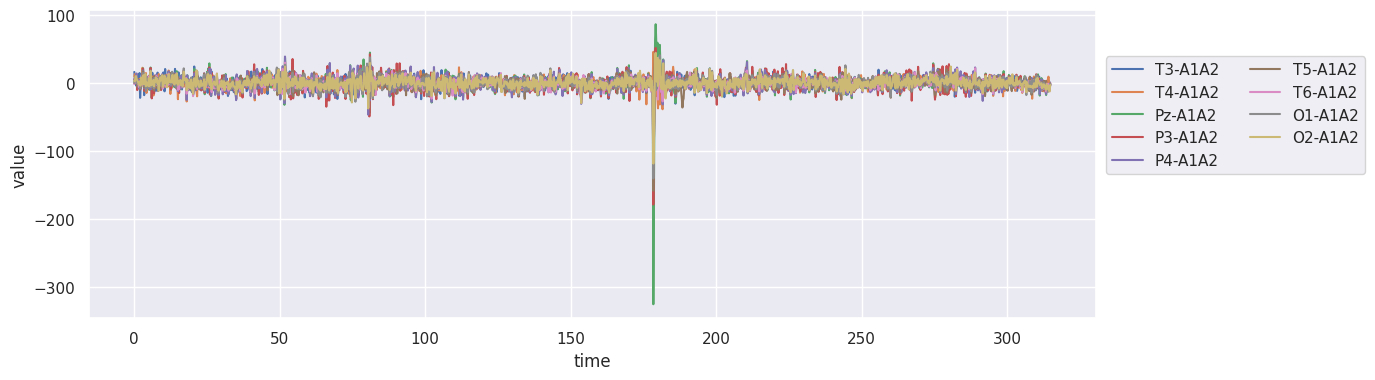

In [37]:
ts_selected = ts[selected_cols]
plot_all_ts(ts_selected.iloc[::100, :])   # Subsample for fast plotting

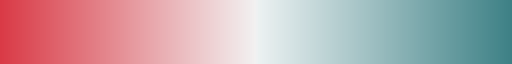

In [38]:
sns.diverging_palette(10, 200, as_cmap=True)

In [39]:
def plot_corr_heatmap(ts):
    # Adapting this example https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    sns.set_theme(style="white")
    corr = ts.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6,5))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5});

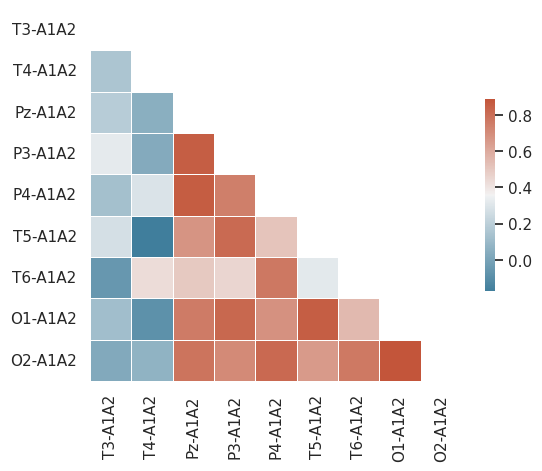

In [42]:
ts_without_time = ts_selected.drop(columns=["time"])
plot_corr_heatmap(ts_without_time)

## Process data

In [45]:
subs = ts_without_time - ts_without_time.mean(axis=0)
ts_subs = pd.concat((ts[["time"]], subs), axis=1)
ts_subs

,time,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2
0,0.000,16.630838,9.458918,3.051323,5.493074,6.560627,-0.153993,-1.220754,0.457643,3.660627
1,0.002,21.513646,6.559750,4.119438,7.171539,8.086505,-0.153993,-1.525930,-0.000120,4.270978
2,0.004,21.971410,0.456239,4.272026,7.476715,7.933917,-0.306580,-2.288869,-1.525998,3.660627
3,0.006,18.156715,-7.325737,3.509087,6.713776,6.408039,-0.459168,-3.662159,-3.357051,1.982162
4,0.008,11.137678,-14.802538,2.288384,5.645661,4.119223,-0.306580,-5.035449,-4.882929,-0.306655
...,...,...,...,...,...,...,...,...,...,...
157495,314.990,-2.137458,1.524354,15.258345,0.457677,-1.831700,-2.137634,10.681092,0.305055,-1.527357
157496,314.992,-0.611581,0.608827,4.119438,0.305089,-0.305823,-1.222107,-1.831106,0.152468,-1.832533
157497,314.994,1.066885,-1.679989,-12.360042,-0.152674,1.372643,-0.001405,-16.174356,-0.457883,-2.137708
157498,314.996,1.829824,-4.426569,-25.024827,-0.610437,2.288169,1.219297,-23.651157,-1.068235,-2.137708


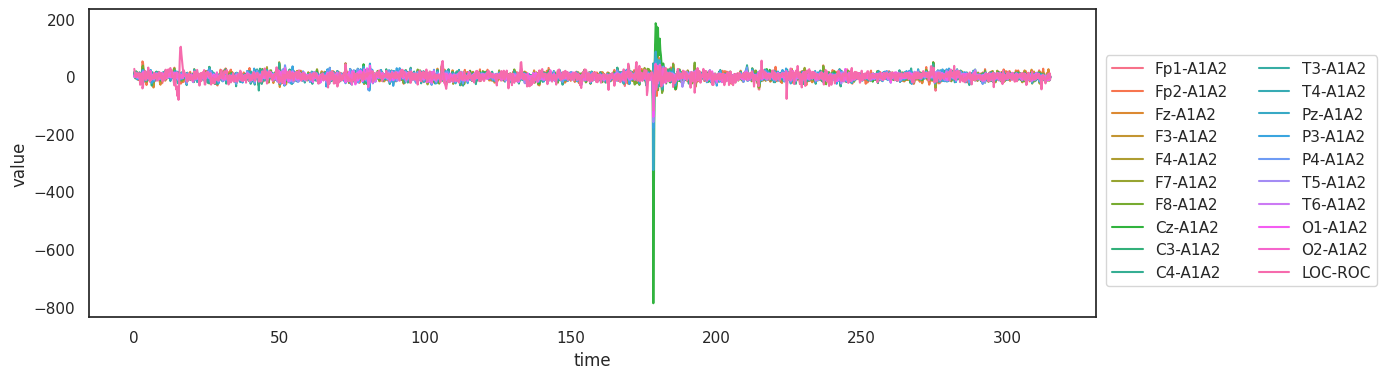

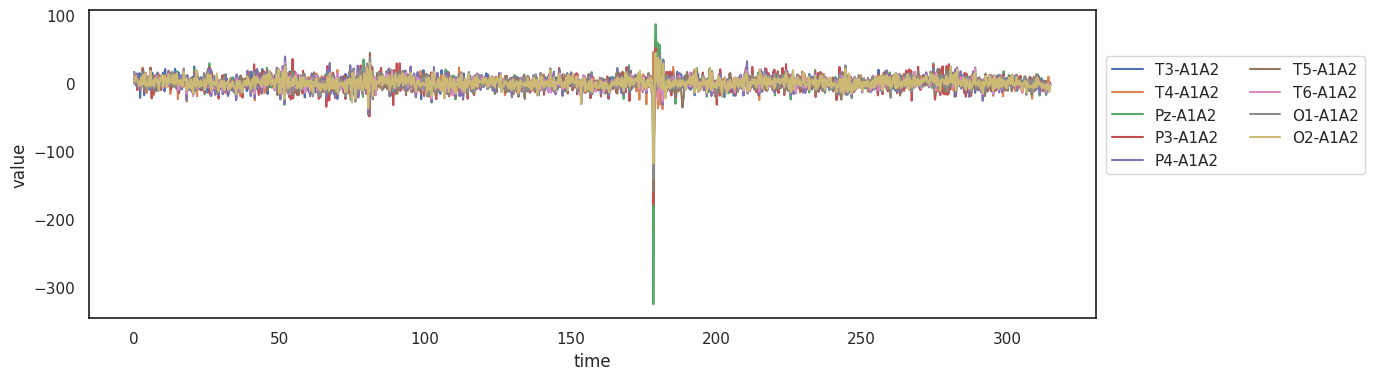

In [46]:
plot_all_ts(ts.iloc[::100, :])
plot_all_ts(ts_subs.iloc[::100, :])

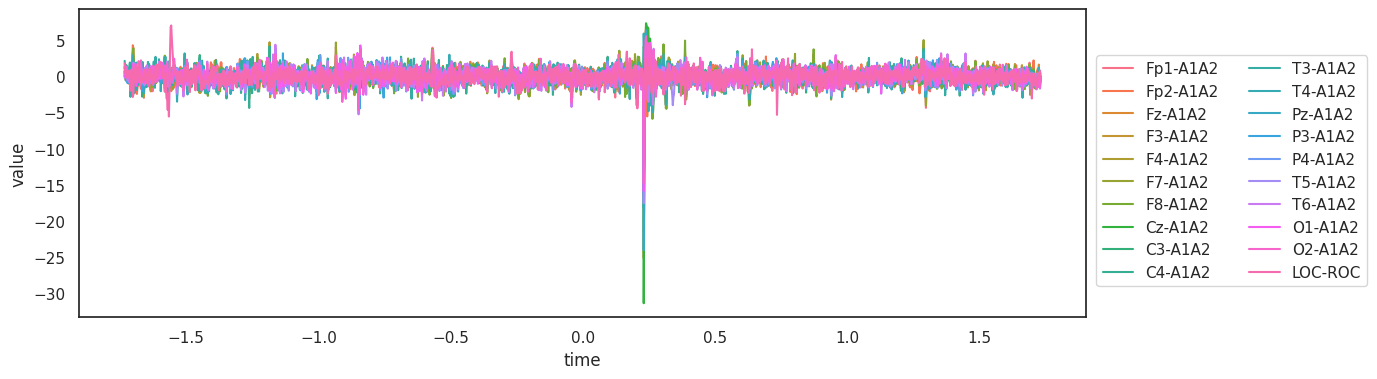

In [47]:
# Standarize values
ts_std = (ts - ts.mean(0)) / ts.std(0)
plot_all_ts(ts_std.iloc[::100, :])

## Consolidate workflow

In [48]:
# Plot RecordingDuration across subjects
!ls {get_subject_folders(PATH)[0]}

eeg  sub-26_scans.tsv


In [49]:
!ls {get_subject_folders(PATH)[0]/"eeg"}

sub-26_task-oa_channels.tsv  sub-26_task-oc_channels.tsv
sub-26_task-oa_eeg.edf	     sub-26_task-oc_eeg.edf
sub-26_task-oa_eeg.json      sub-26_task-oc_eeg.json


In [50]:
list((get_subject_folders(PATH)[0]/"eeg").iterdir())[0]

PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.json')

In [51]:
import json 

eeg_metadata = json.loads(
    list((get_subject_folders(PATH)[0]/"eeg").iterdir())[1].read_text()
)
eeg_metadata

{'TaskName': 'oc',
 'Manufacturer': 'n/a',
 'PowerLineFrequency': 'n/a',
 'SamplingFrequency': 500.0,
 'SoftwareFilters': 'n/a',
 'RecordingDuration': 314.998,
 'RecordingType': 'continuous',
 'EEGReference': 'n/a',
 'EEGGround': 'n/a',
 'EEGPlacementScheme': 'n/a',
 'EEGChannelCount': 20,
 'EOGChannelCount': 0,
 'ECGChannelCount': 0,
 'EMGChannelCount': 0,
 'MiscChannelCount': 0,
 'TriggerChannelCount': 0}

In [52]:
eeg_metadata["RecordingDuration"]

314.998

In [53]:
def get_subject_recording_duration(subject_id, path):
    subject_file = path / f"{subject_id}/eeg/{subject_id}_task-oc_eeg.json" 
    eeg_metadata = json.loads(subject_file.read_text())
    return eeg_metadata["RecordingDuration"]

get_subject_recording_duration("sub-26", PATH)

314.998

In [54]:
def get_unique_subject_ids(path):
    metadata = pd.read_csv(path/"participants.tsv", sep="\t")
    return metadata.participant_id.unique()

get_unique_subject_ids(PATH)

array(['sub-1', 'sub-10', 'sub-12', 'sub-13', 'sub-15', 'sub-16',
       'sub-17', 'sub-18', 'sub-2', 'sub-21', 'sub-22', 'sub-24',
       'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-31',
       'sub-32', 'sub-35', 'sub-36', 'sub-37', 'sub-38', 'sub-39',
       'sub-40', 'sub-41', 'sub-42', 'sub-43', 'sub-45', 'sub-46',
       'sub-47', 'sub-48', 'sub-49', 'sub-5', 'sub-50', 'sub-7', 'sub-9'],
      dtype=object)

In [55]:
recording_durations = [
    get_subject_recording_duration(subject_id, PATH)
    for subject_id in get_unique_subject_ids(PATH)
]
recording_durations[:5]

[210.998, 192.998, 302.998, 302.998, 292.998]

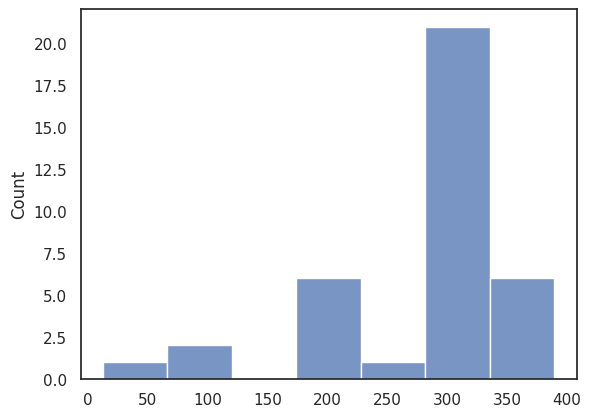

In [56]:
sns.histplot(recording_durations);

In [59]:
def load_eeg(subject_id, path):
    subject_edf = path/f"{subject_id}/eeg/{subject_id}_task-oc_eeg.edf"
    content = mne.io.read_raw_edf(subject_edf)
    return content.to_data_frame()
    data = content.get_data()
    channels = content.ch_names
    ts = dict(zip(content.ch_names, data))
    ts["time"] = content.times
    return pd.DataFrame(ts)

In [61]:
def load_eeg_all_subjects(path):
    eeg_subjects = []
    for subject_id in get_unique_subject_ids(path):
        ts = load_eeg(subject_id, path)
        ts["subject_id"] = subject_id
        eeg_subjects.append(ts)
    return pd.concat(eeg_subjects)

In [62]:
eeg = load_eeg_all_subjects(PATH)

Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-1/eeg/sub-1_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-10/eeg/sub-10_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-12/eeg/sub-12_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-13/eeg/sub-13_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-15/eeg/sub-15_task-oc_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting E

/tmp/ipykernel_1050206/1510938589.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  content = mne.io.read_raw_edf(subject_edf)


In [63]:
eeg

,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,...,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC,subject_id
0,0.000,-15.560453,-21.663964,-7.931064,-6.710362,-12.813873,5.344072,-15.560453,-13.424224,-18.154445,...,-12.661285,-2.895668,-13.576812,-4.879309,-3.200843,-6.252599,-11.745758,-0.606851,23.807192,sub-1
1,0.002,-18.764796,-25.478658,-8.541415,-6.710362,-14.187163,8.243240,-18.154445,-15.865628,-21.511376,...,-15.407865,-3.506019,-16.170804,-5.184484,-3.200843,-6.710362,-14.492338,-0.454263,28.537413,sub-1
2,0.004,-20.595849,-27.462299,-8.999179,-6.405186,-14.644926,9.921705,-19.375147,-17.238918,-23.495017,...,-16.781155,-4.268958,-17.544094,-4.879309,-3.048255,-6.710362,-16.018216,-0.454263,30.978818,sub-1
3,0.006,-21.358788,-27.920062,-9.609530,-6.557774,-15.560453,10.226881,-19.832910,-18.001857,-24.105368,...,-16.781155,-4.879309,-18.001857,-4.726721,-2.895668,-6.710362,-16.933743,-0.606851,31.283993,sub-1
4,0.008,-21.663964,-27.920062,-10.525056,-7.320713,-16.781155,8.548415,-20.138086,-18.307033,-24.105368,...,-15.865628,-5.489660,-17.696681,-4.726721,-3.048255,-6.557774,-17.086330,-1.064614,30.063291,sub-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96495,192.990,13.278636,-0.606851,-2.437904,-0.912027,13.126048,0.461263,-2.437904,-0.912027,13.736399,...,0.766439,13.583812,0.766439,-1.980141,-0.454263,13.736399,0.919027,-1.827553,0.308676,sub-9
96496,192.992,0.308676,-0.301676,-2.437904,0.461263,0.003500,0.766439,-2.437904,0.461263,0.766439,...,2.139729,0.461263,1.071614,-1.980141,0.919027,0.766439,1.224202,-1.674965,1.681965,sub-9
96497,192.994,-16.170804,-1.217202,-1.522378,1.071614,-16.475979,0.003500,-1.674965,1.071614,-15.865628,...,2.902668,-15.865628,0.156088,-1.369790,1.681965,-15.560453,0.156088,-1.064614,2.444904,sub-9
96498,192.996,-26.851948,-2.743080,-0.606851,0.613851,-27.004536,-1.522378,-0.759439,0.613851,-26.851948,...,2.292317,-26.394184,-1.369790,-0.149088,1.224202,-26.241597,-1.522378,0.003500,1.681965,sub-9


In [61]:
eeg.columns

Index(['EEG Fp1-A1A2', 'EEG Fp2-A1A2', 'EEG Fz-A1A2', 'EEG F3-A1A2',
       'EEG F4-A1A2', 'EEG F7-A1A2', 'EEG F8-A1A2', 'EEG Cz-A1A2',
       'EEG C3-A1A2', 'EEG C4-A1A2', 'EEG T3-A1A2', 'EEG T4-A1A2',
       'EEG Pz-A1A2', 'EEG P3-A1A2', 'EEG P4-A1A2', 'EEG T5-A1A2',
       'EEG T6-A1A2', 'EEG O1-A1A2', 'EEG O2-A1A2', 'EEG LOC-ROC', 'time',
       'subject_id'],
      dtype='object')

In [ ]:
# Select some columns and time
data = eeg[list(eeg.columns[:4]) + ["subject_id"]]
data_long = data.melt(
    id_vars=["subject_id", "time"],
    var_name="channel",
)
# Optional: Simulate shift for visualization
# data_long.loc[data_long.channel.isin(data_long.channel.unique()[:2]), ["value"]] +=20
data_long

<Axes: xlabel='time', ylabel='value'>

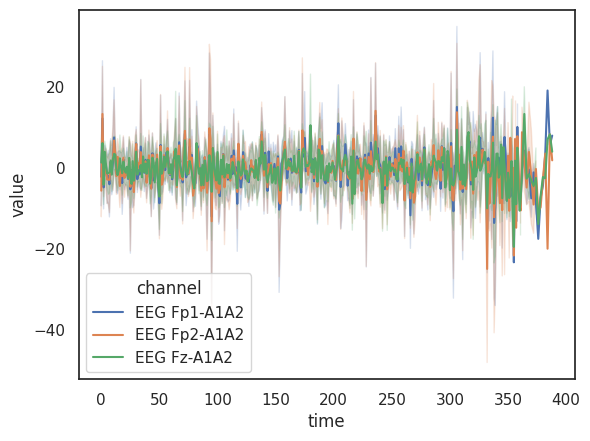

In [169]:
sns.lineplot(
    data=data_long.iloc[::1000, :],
    x="time",
    y="value",
    hue="channel",
)

In [170]:
data_long

,subject_id,time,channel,value
0,sub-1,0.000,EEG Fp1-A1A2,-15.560453
1,sub-1,0.002,EEG Fp1-A1A2,-18.764796
2,sub-1,0.004,EEG Fp1-A1A2,-20.595849
3,sub-1,0.006,EEG Fp1-A1A2,-21.358788
4,sub-1,0.008,EEG Fp1-A1A2,-21.663964
...,...,...,...,...
15527995,sub-9,192.990,EEG Fz-A1A2,-2.437904
15527996,sub-9,192.992,EEG Fz-A1A2,-2.437904
15527997,sub-9,192.994,EEG Fz-A1A2,-1.522378
15527998,sub-9,192.996,EEG Fz-A1A2,-0.606851


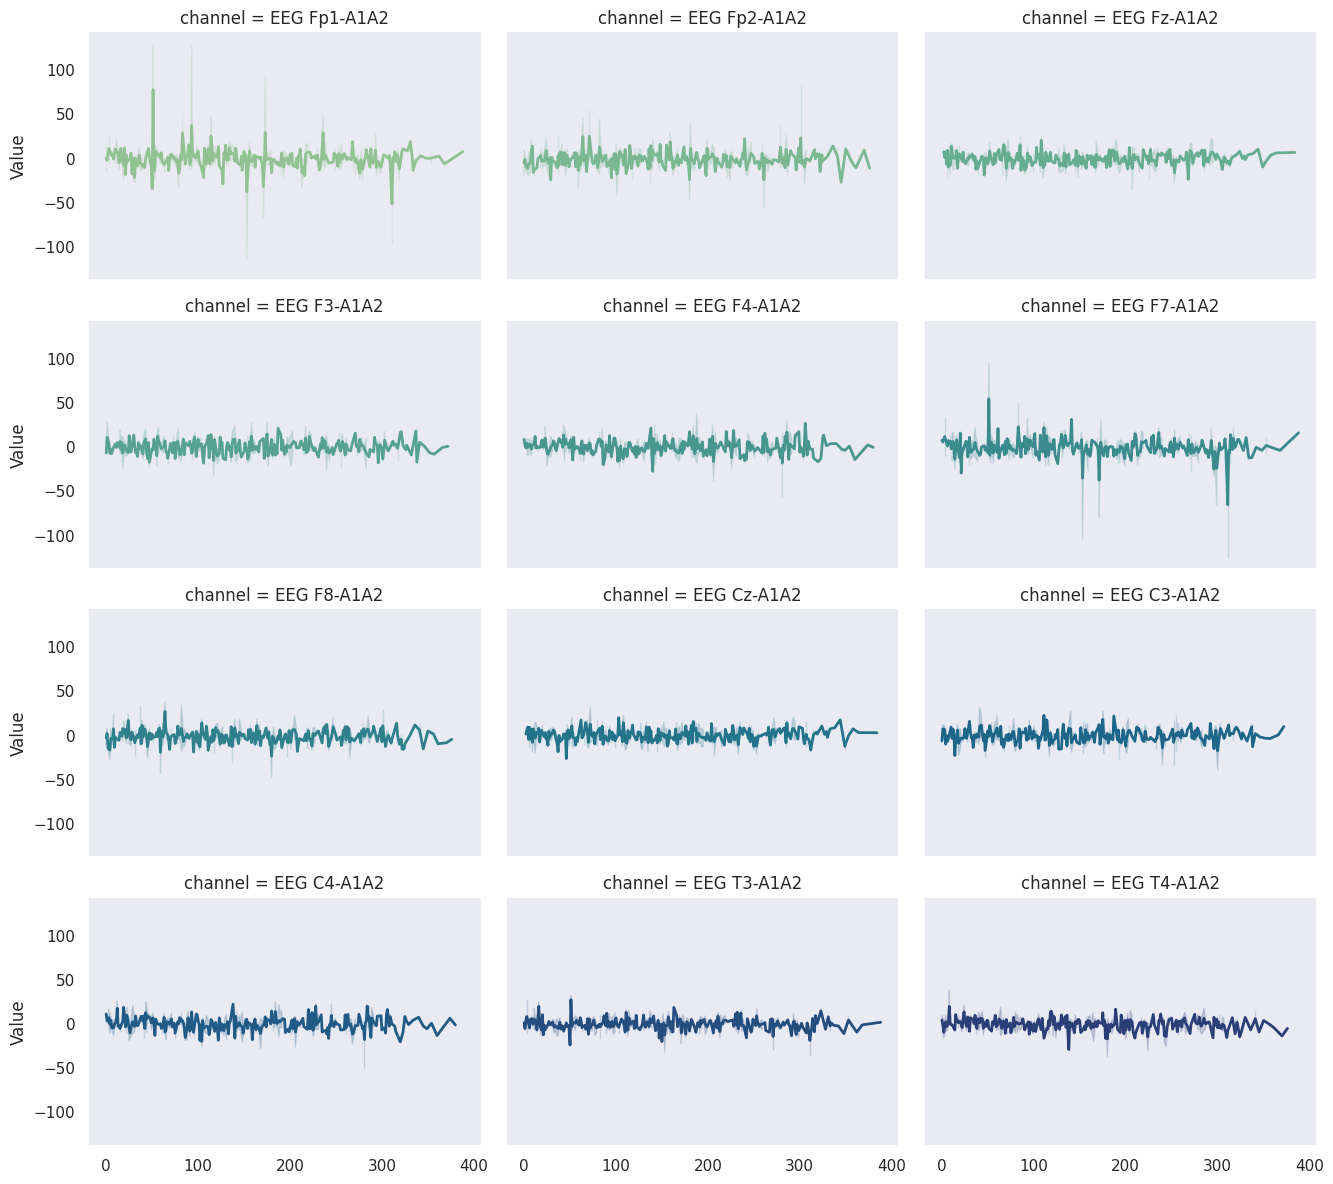

In [177]:
# Adapt https://seaborn.pydata.org/examples/timeseries_facets.html
sns.set_theme(style="dark")

data = eeg[list(eeg.columns[:13]) + ["subject_id"]]
data_long = data.melt(
    id_vars=["subject_id", "time"],
    var_name="channel",
)
data_long = data_long.iloc[::10000, :]

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data_long,
    x="time",
    y="value",
    col="channel",
    hue="channel",
    kind="line", 
    palette="crest", 
    linewidth=2, zorder=5,
    col_wrap=3, height=3, aspect=1.5, legend=False,
)

g.set_axis_labels("", "Value")
g.tight_layout()

In [190]:
data

,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,subject_id,group
0,0.000,-15.560453,-21.663964,-7.931064,-6.710362,sub-1,1
50000,100.000,8.548415,3.818194,5.344072,13.583812,sub-1,2
0,0.000,3.055255,4.733721,-0.454263,1.834553,sub-10,1
50000,100.000,9.006179,12.668285,15.567453,4.733721,sub-10,2
0,0.000,-3.963782,1.834553,-7.168125,-6.100011,sub-12,1
...,...,...,...,...,...,...,...
146499,292.998,-3.811194,-5.184484,-7.168125,-5.184484,sub-50,2
0,0.000,15.567453,-0.149088,-1.980141,0.613851,sub-7,2
50000,100.000,1.987141,0.156088,3.970782,3.970782,sub-7,2
0,0.000,-10.219881,7.327713,-2.132729,-8.694003,sub-9,3


In [191]:
# Pick a few channels
data = eeg[list(eeg.columns[:5]) + ["subject_id"]]

In [199]:
g1, g2, g3 = np.array_split(data.subject_id.unique(), 3)
g1, g2, g3 = set(g1), set(g2), set(g3)

In [200]:
group = []
for sub in data.subject_id:
    if sub in g1:
        group.append(1)
    elif sub in g2:
        group.append(2)
    else:
        group.append(3)

In [202]:
len(group), len(data)

(5176000, 5176000)

In [203]:
data.loc[:, ["group"]] = group 
# Pick 3 timepoints
data = data[data.time.isin([0, 100, 292.998])]
data_long = data.melt(
    id_vars=["subject_id", "time", "group"],
    var_name="channel",
)
data_long

,subject_id,time,group,channel,value
0,sub-1,0.000,1,EEG Fp1-A1A2,-15.560453
1,sub-1,100.000,1,EEG Fp1-A1A2,8.548415
2,sub-10,0.000,1,EEG Fp1-A1A2,3.055255
3,sub-10,100.000,1,EEG Fp1-A1A2,9.006179
4,sub-12,0.000,1,EEG Fp1-A1A2,-3.963782
...,...,...,...,...,...
383,sub-50,292.998,3,EEG F3-A1A2,-5.184484
384,sub-7,0.000,3,EEG F3-A1A2,0.613851
385,sub-7,100.000,3,EEG F3-A1A2,3.970782
386,sub-9,0.000,3,EEG F3-A1A2,-8.694003


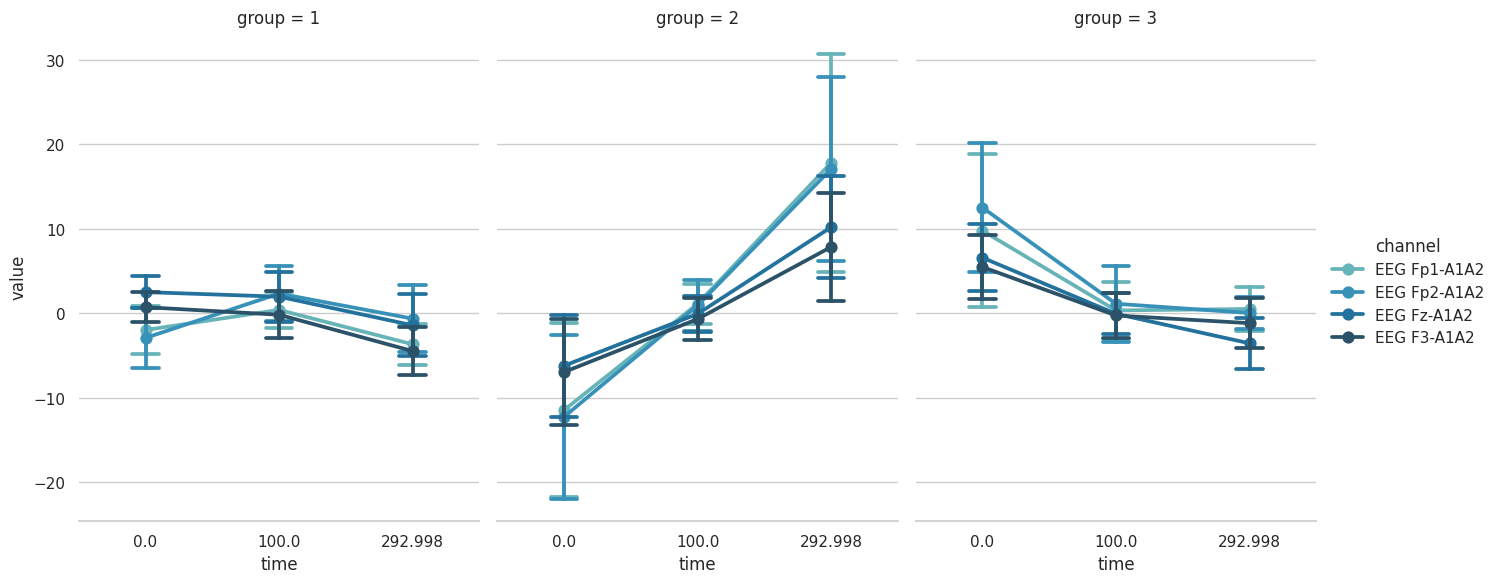

In [204]:
sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=data_long,
    x="time", 
    y="value", 
    hue="channel",
    col="group",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)